# Preliminary Analysis

In [106]:
# import all necessary packages
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import operator
import os
import pickle
import pprint
import re
import requests
import urllib, urllib2
from collections import defaultdict
from __future__ import division
from itertools import count
import pandas as pd
import random as rand
# IPython specifics
%matplotlib inline

In [2]:
#load the data file
data_path =os.getcwd()+"\\company_data.csv"
print data_path
coms_df=pd.read_csv(data_path)
coms_df

D:\1st Semester Master\Social Graphs and interaction\Project\company_data.csv


D:\Applications\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,wiki_name,location_city,links,wiki_url,wiki_raw,wiki_name.1,name_url_quoted,wiki_api_url,all_links,wiki_page_id,...,industry,key_people,founded,products,location,logo,type,defunct,parent,subsid
0,&pizza,NaN,NaN,https://en.wikipedia.org/w/index.php?title=%26...,NaN,&pizza,%26pizza,NaN,NaN,47858476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+Beryll,NaN,NaN,https://en.wikipedia.org/w/index.php?title=%2B...,NaN,+Beryll,%2BBeryll,NaN,NaN,13860681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,...instore,NaN,"{Home Bargains, Heron Foods, Tesco, Poundstret...",https://en.wikipedia.org/w/index.php?title=......,{{Use dmy dates|date=July 2015}}\n{{Use Britis...,...instore,...instore,https://en.wikipedia.org/w/api.php?&action=par...,"[Aldi, Asda, BBC News Online, B & M, Bargain B...",9291975,...,NaN,NaN,2003,NaN,"Huddersfield, England, United Kingdom",{u'wiki_raw_code': u'[[File:Instore-logo.png]]...,Retail,2009,NaN,NaN
3,01 Communique,NaN,{},https://en.wikipedia.org/w/index.php?title=01+...,{{Infobox company\n| name = 01 Communique\n...,01 Communique,01+Communique,https://en.wikipedia.org/w/api.php?&action=par...,"[Arlington, Virginia, Citrix, I'm InTouch, Mis...",15244876,...,Software,"Andrew Cheung, President",1992,"Remote Access Software, Online Help Desk Suppo...","Mississauga, Ontario, Canada",{u'wiki_raw_code': u'[[File:01 Communique Logo...,Public Listed Company (),NaN,NaN,NaN
4,01 Distribution,NaN,NaN,https://en.wikipedia.org/w/index.php?title=01+...,NaN,01 Distribution,01+Distribution,NaN,NaN,46724099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,07th Expansion,NaN,NaN,https://en.wikipedia.org/w/index.php?title=07t...,NaN,07th Expansion,07th+Expansion,NaN,NaN,5936289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0verflow,"Kanda, Chiyoda , Tokyo",{},https://en.wikipedia.org/w/index.php?title=0ve...,{{Other uses|Overflow (disambiguation)}}\n{{In...,0verflow,0verflow,https://en.wikipedia.org/w/api.php?&action=par...,"[Anime, Anime News Network, CEO, Chiyoda, Toky...",10387049,...,"[Interactive entertainment, Brand novelties]","[{u'last': u'Ōnuma', u'suffix': u'', u'title':...",1997,"[School Days, Summer Days, Cross Days]",NaN,"{u'wiki_raw_code': u'0verflowlogo.png', u'wiki...",Private subsidiary,NaN,Stack Ltd.,NaN
7,1-2-3 (fuel station),NaN,NaN,https://en.wikipedia.org/w/index.php?title=1-2...,NaN,1-2-3 (fuel station),1-2-3+%28fuel+station%29,NaN,NaN,14018485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1-800 Contacts,NaN,NaN,https://en.wikipedia.org/w/index.php?title=1-8...,NaN,1-800 Contacts,1-800+Contacts,NaN,NaN,4613366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1-800-FREE-411,NaN,NaN,https://en.wikipedia.org/w/index.php?title=1-8...,NaN,1-800-FREE-411,1-800-FREE-411,NaN,NaN,18480351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print list(coms_df.columns.values)

['wiki_name', 'location_city', 'links', 'wiki_url', 'wiki_raw', 'wiki_name.1', 'name_url_quoted', 'wiki_api_url', 'all_links', 'wiki_page_id', 'location_country', 'homepage', 'is_company', 'name', 'num_employees', 'industry', 'key_people', 'founded', 'products', 'location', 'logo', 'type', 'defunct', 'parent', 'subsid']


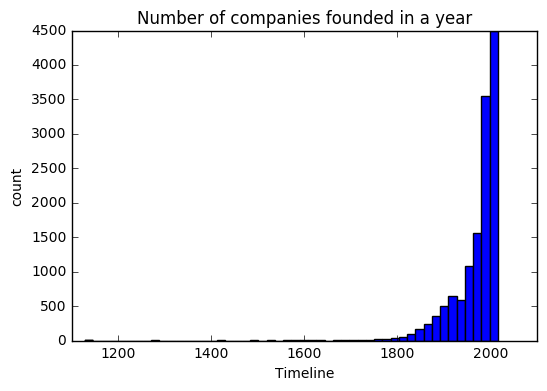

In [80]:
# -500 = 500 before Christi, 25 bins for every century
cle_founded_years=list()
founded_years=coms_df['founded'].dropna().values.tolist()
for founded_year in founded_years:
    if re.search(r'(\d{4})', founded_year):
        cle_founded_years.append(int(re.search(r'(\d{4})', founded_year).group(1)))


count, bins, ignored = plt.hist(cle_founded_years, bins=50, range=(min(cle_founded_years), max(cle_founded_years)))
plt.title("Number of companies founded in a year")
plt.xlabel('Timeline')
plt.ylabel('count')
plt.show()

In [4]:
#save company names in a list
coms_list=dict() 
coms_list=['wiki_name'].values.tolist()

##  *** 0. Network Construction ***

In [10]:
#network construction 
com_graph = nx.DiGraph()


for index, row in coms_df.iterrows():
    if row["is_company"] is True:
        com_text = row["wiki_raw"]
        com_links = re.findall(r'\[\[(.+?)\]\]', com_text)
        # list with all outgoing links for edges
        # decode unicode chars and clean the link for matching
        out_links = [l.decode('unicode-escape').split('|')[0] for l in com_links]
        #print out_links
        all_edges = set(coms_list).intersection(out_links)
        #print all_edges
        com=row["wiki_name"]
        com_graph.add_node(com)
        for e in all_edges:
            com_graph.add_edge(com, e)

D:\Applications\anaconda2\lib\site-packages\ipykernel\__main__.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [12]:
print "There are {0} nodes in the network".format(len(com_graph.nodes()))
print "There are {0} edges in the network".format(len(com_graph.edges()))

There are 27239 nodes in the network
There are 45046 edges in the network


In [82]:
# create undirected version
com_graph_undir = com_graph.to_undirected()

##  *** 1. Degree Distribution ***

  * ** 1.1 Plot the degree distribution of the companies in the network **
    + Plot the distribution in both linear & loglog fashion
    + Analyze whether preferentail attachment mechanism exist (or check whether the distribution very much like  Barabasi-Albert Model)
    +  Zipf's law applys? (20% top )

('Company network maximum degree:', 316, 'minimum degree:', 0)
Top 10 Companies by in-degree:
[(u'Reuters', 316), (u'Microsoft', 277), (u'IBM', 182), (u'Bloomberg L.P.', 176), (u'Los Angeles Times', 154), (u'Google', 148), (u'Sony', 132), (u'BBC', 132), (u'Apple Inc.', 129), (u'General Motors', 128)]


Top 10 Companies by out-degree:
[(u'HBO', 77), (u'Kohlberg Kravis Roberts', 75), ('AlpInvest Partners', 70), (u'Warner Bros.', 70), (u'Metro-Goldwyn-Mayer', 67), (u'Apollo Global Management', 67), (u'Samsung', 64), (u'Kroger', 61), (u'American Express', 60), (u'The Carlyle Group', 55)]


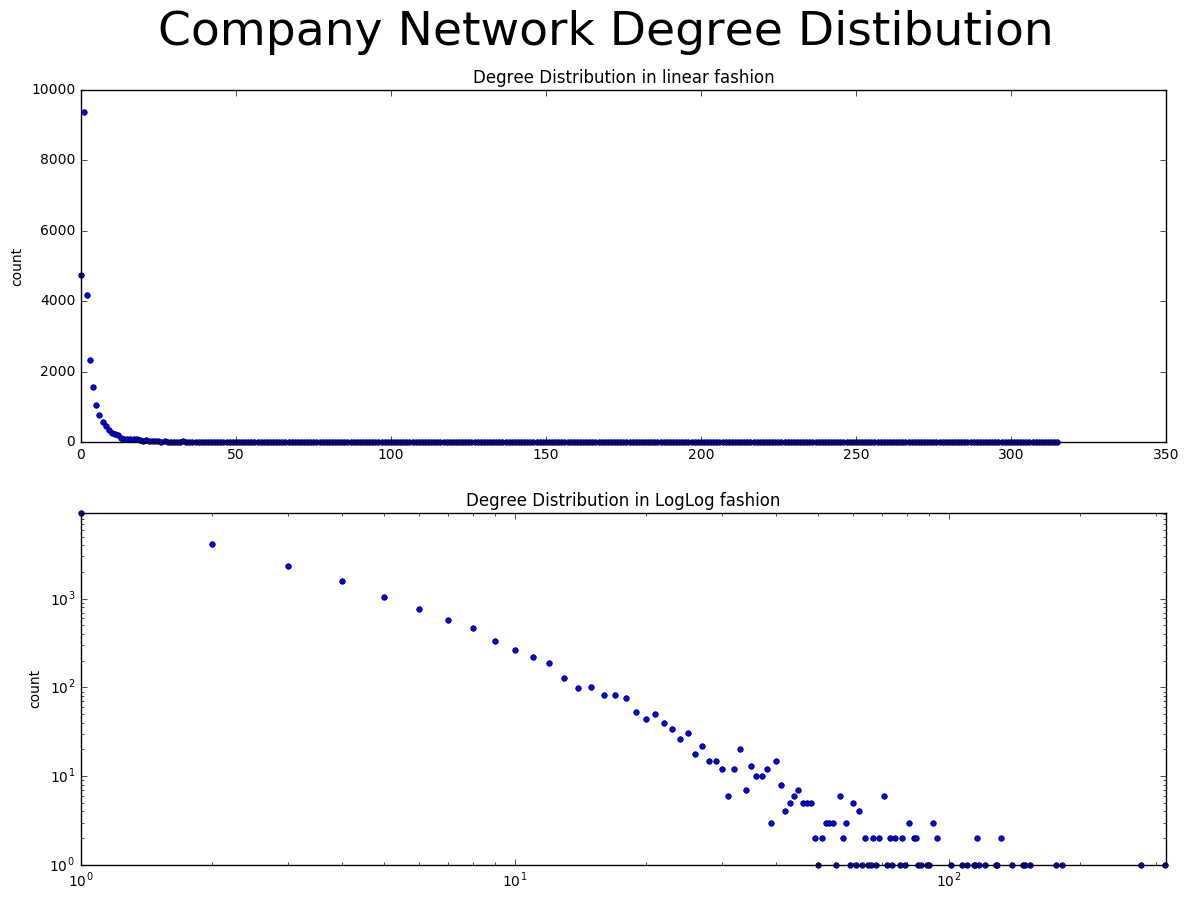

In [18]:
# get degree distribution

deg_seq_cn = sorted(nx.degree(com_graph).values(), reverse=True)
d_min_CN = min(deg_seq_cn)
d_max_CN = max(deg_seq_cn)
print ("Company network maximum degree:", d_max_CN, "minimum degree:", d_min_CN)

print 'Top 10 Companies by in-degree:\n', sorted(com_graph.in_degree_iter(), key=operator.itemgetter(1), reverse=True)[0:10]
print '\n\nTop 10 Companies by out-degree:\n', sorted(com_graph.out_degree_iter(), key=operator.itemgetter(1), reverse=True)[0:10]
# plot degree distribution
bins_CN = xrange(d_min_CN, d_max_CN+1) 
hist_CN, bin_edg_CN = np.histogram(deg_seq_cn, bins=bins_CN)

# plot histogram data (normal & loglog)
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Company Network Degree Distibution', fontsize=34)

plt.subplot('211')
plt.plot(bin_edg_CN[:-1], hist_CN, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("Degree Distribution in linear fashion")

plt.subplot('212')
plt.loglog(bin_edg_CN[:-1], hist_CN, 'ro', color='blue', markersize=4, clip_on=False)
plt.title("Degree Distribution in LogLog fashion")
plt.axis([min(bin_edg_CN), max(bin_edg_CN), min(hist_CN), max(hist_CN)])
plt.ylabel("count")
plt.show()

  * ** 1.2 Plot the in/out degree distribution of the companies in the network from directed graph **
* The correlation coefficient between in/out degree 

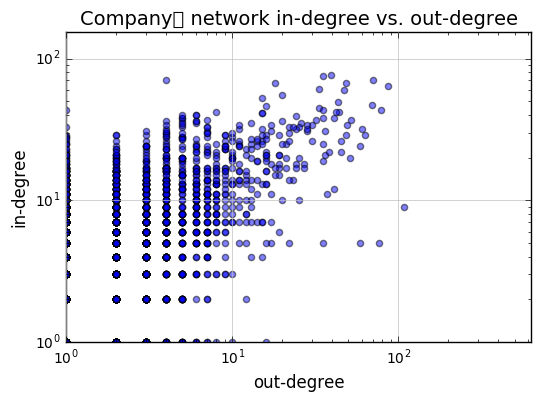

Correlation coefficient is: 0.159428841215


In [81]:
in_deg_val = com_graph.in_degree().values()
out_deg_val = com_graph.out_degree().values()

fig, ax = plt.subplots()

ax.set_title("Company network in-degree vs. out-degree", fontsize=14)
ax.set_xlabel("out-degree", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_xlim([1, max(in_deg_val) * 2])
ax.set_ylim([1, max(out_deg_val) * 2])
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(in_deg_val, out_deg_val, alpha=0.5)

plt.show()

print ('Correlation coefficient is: {0}'.format(np.corrcoef(x=out_deg_val, y=in_deg_val)[0,1]))

## *** 2. Power-laws and the friendship paradox ***
  * **2.1 Does the neighbor companies of a company are popular than itself **

In [37]:
# pick a random company
i = rand.choice(com_graph.nodes())
iDegree = com_graph.degree(i)

In [38]:
#find all its neighbors
iNeighbors = com_graph.neighbors(i)
if len(iNeighbors)>0:
    fpDegree = sum(com_graph.degree(iNeighbors).values()) / float(len(iNeighbors))
print ("Random Company i:", i)
print ("Degree:", iDegree)
print ("Neighbors:", iNeighbors)
print ("Average degree of neighbors:", fpDegree)

('Random Company i:', 'Dapol')
('Degree:', 5)
('Neighbors:', [u'Airfix', u'BBC', u'Hornby Railways', u'Palitoy'])
('Average degree of neighbors:', 37.75)


+ in this case, friendshi parradox exist as Dapol's neighbor has higher degree...

  * **2.2 Assortativity of the company network **

In [97]:
print "Graph General assortativity:", nx.degree_pearson_correlation_coefficient(com_graph_undir)
print "Graph In-degree assortativity:", nx.degree_pearson_correlation_coefficient(com_graph,'in','in')
print "Graph Out-degree assortativity:", nx.degree_pearson_correlation_coefficient(com_graph,'out','out')

Graph General assortativity: -0.0156455430146
Graph In-degree assortativity: 0.00404256103891
Graph Out-degree assortativity: 0.0473633710718


+ In a Directed graph, in-assortativity and out-assortativity measure the tendencies of nodes to connect with other nodes that have similar in and out degrees as themselves, respectively. As it is shown. Company with similar out-degree has stronger corrrelation.

    
        
            

# Advanced Analysis

## *** 3. Company Centraility ***

  * ** 3.1 Generally, the 5 most central companies according to betweenness centrality **

In [42]:
node_dict = nx.betweenness_centrality(com_graph) 
#print Counter(node_dict).most_common(5) # use to print with betweenness_centrality

# just print the philosophers, from 1 (most central) to 5 (less central in top 5)
print sorted(node_dict, key=node_dict.get, reverse=True)[:5]

[u'DirecTV', u'Samsung', u'Bloomberg News', u'Nintendo', u'American Express']


  * ** 3.2 Generally, the 5 most central companies according to eigenvector centrality **

In [41]:
### eigenvector centrality
# in-edges
node_in_eigen = nx.eigenvector_centrality(com_graph)
# For out-edges eigenvector centrality first reverse the graph with G.reverse().
node_out_eigen = nx.eigenvector_centrality(com_graph.reverse())

print "5 most central companies according to in-edges eigenvector centrality:"
print sorted(node_in_eigen, key=node_in_eigen.get, reverse=True)[:5]
print "\nFor comparison:"
print "out-edges eigenvector centrality: ", sorted(node_out_eigen, key=node_out_eigen.get, reverse=True)[:5]


5 most central philosophers according to in-edges eigenvector centrality:
[u'Time Warner', u'Warner Bros.', u'Metro-Goldwyn-Mayer', u'Paramount Pictures', u'Los Angeles Times']

For comparison:
out-edges eigenvector centrality:  [u'HBO', u'Metro-Goldwyn-Mayer', u'Imagine Entertainment', u'Orion Pictures', u'DirecTV']


  * ** 3.3 Generally, the 5 most companies according to in/out degree centrality **

In [48]:
### degree centrality
# in-edges
node_in_degree = nx.degree_centrality(com_graph)
# out-edges
node_out_degree = nx.degree_centrality(com_graph.reverse())

print "in-edges degree centrality: ", sorted(node_in_degree, key=node_in_degree.get, reverse=True)[:5]
print "out-edges degree centrality: ", sorted(node_out_degree, key=node_out_degree.get, reverse=True)[:5]

in-edges degree centrality:  [u'Reuters', u'Microsoft', u'IBM', u'Bloomberg L.P.', u'Los Angeles Times']
out-edges degree centrality:  [u'Reuters', u'Microsoft', u'IBM', u'Bloomberg L.P.', u'Los Angeles Times']


## *** 4. Modularity ***

  * ** 4.1 Use the Python Louvain-algorithm **

* ** 4.2 Community detection **